# Q-1 Load the image dog.jpg and convert to grayscale. We will repeat Exercise 2-1, using the FFT to compress the image at different compression ra- tios. However, now, we will compare the error versus compression ratio for the image downsampled at different resolutions. Compare the original image (2000 × 1500) and downsampled copies of the following resolutions: 1000 × 750, 500 × 375, 200 × 150, and 100 × 75. Plot the error versus compression ratio for each image resolution on the same plot. Explain the observed trends.

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/gdrive')



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


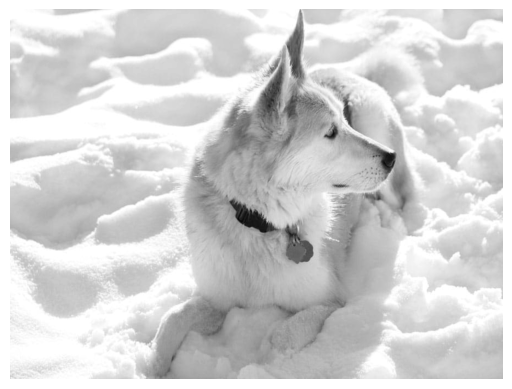

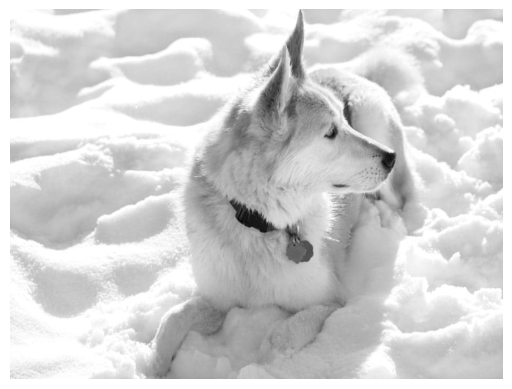

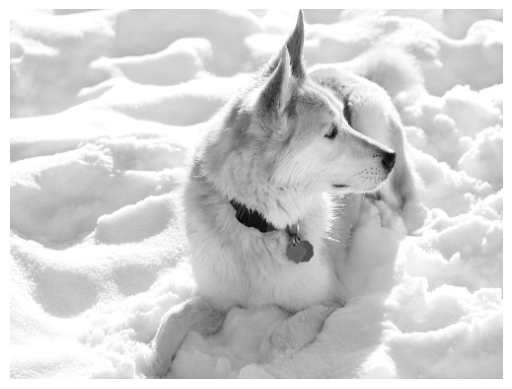

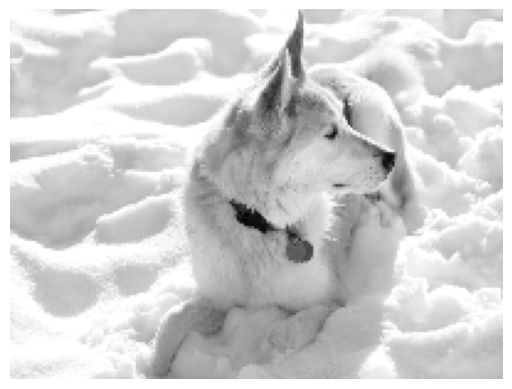

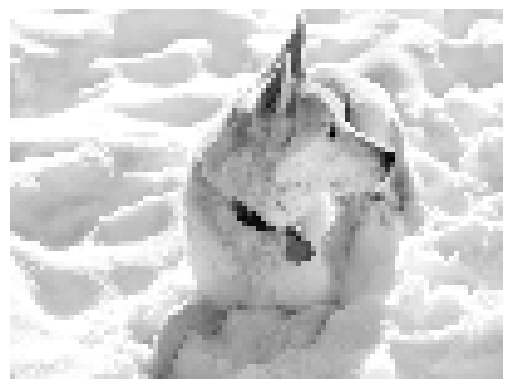

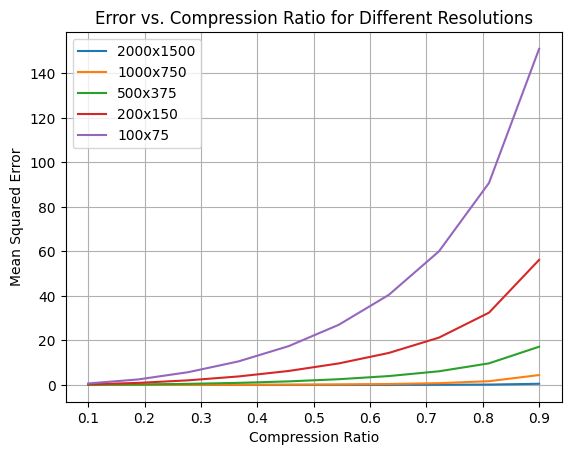

In [4]:

# Load the image and convert to grayscale
image = cv2.imread('/content/gdrive/MyDrive/Sparsity_Assgn/Golden-Retriever-Husky-Mix-.jpg', cv2.IMREAD_GRAYSCALE)

# Define different resolutions
resolutions = [(2000, 1500), (1000, 750), (500, 375), (200, 150), (100, 75)]

# Compression ratios to test
compression_ratios = np.linspace(0.1, 0.9, 10)

# Initialize a list to store errors for each resolution
errors = []

for width, height in resolutions:
    # Downsample the image to the specified resolution
    resized_image = cv2.resize(image, (width, height))
    img = plt.imshow(resized_image)
    img.set_cmap('gray')
    plt.axis('off')
    plt.show()

    # Calculate FFT
    f_transform = np.fft.fft2(resized_image)

    # Initialize a list to store errors for each compression ratio
    errors_resolution = []

    for ratio in compression_ratios:
        # Sort the magnitude spectrum and set the lowest coefficients to zero
        sorted_magnitude = np.sort(np.abs(f_transform).flatten())
        # print(sorted_magnitude.shape)
        threshold_index = int(len(sorted_magnitude) * ratio)
        # print(threshold_index)
        threshold = sorted_magnitude[threshold_index]
        f_transform_copy = f_transform.copy()
        f_transform_copy[np.abs(f_transform) < threshold] = 0

        # Calculate the inverse FFT
        compressed_image = np.fft.ifft2(f_transform_copy).real

        # Calculate the mean squared error between the original and compressed images
        mse = np.mean((resized_image - compressed_image) ** 2)

        errors_resolution.append(mse)

    errors.append(errors_resolution)

# Plot error versus compression ratio for each resolution
for i, resolution in enumerate(resolutions):
    plt.plot(compression_ratios, errors[i], label=f"{resolution[0]}x{resolution[1]}")

plt.xlabel('Compression Ratio')
plt.ylabel('Mean Squared Error')
plt.title('Error vs. Compression Ratio for Different Resolutions')
plt.legend()
plt.grid()
plt.show()
